
# Continuous Nonlinear Dynamics, Part 1


(Partially adapted from Landau Chapter 15, *Continuous Nonlinear Dynamics*. Equation labels are kept the same for comparison if you have the textbook.)

In the previous module, we developed the logistic map as a means to
understand how biological populations achieve dynamic equilibrium. There, we explored a **discrete** dynamical system. 

In this module we will turn to explore **continuous**
systems where chaotic behavior emerge, using pendulums from classical mechanics as our main examples. In PHYS 3510 we have already developed tools to solve ordinary differential equations (ODEs) to model classical mechanical systems. Here we will use ODE solvers to further exploring chaos, as well as work with new concepts – like phase
space – to display simple analysis graphs that underly complex behaviors.


# 0.  Refresher on ODE solvers

It's been a while since the introductory course, so let's start with a quick refresher on ODE solvers. The following is a minimal example with just one variable $x$. Here we are applying Euler's method to the differential equation

$$\frac{d x(t)}{dt} = 0.5 x(t)$$ with the initial condition $x(0)=1$.

At every time step, the dynamics of $x$ is propagated forward by $dt$ according to $d x = 0.5 x(t) dt$, and updates $x(t)$ into 

$$x(t+dt) = x(t)+dx = x + 0.5x(t)dt$$

This is achieved by the move_Euler() function, where the local variable $y$ performs this calculation on behalf of $x$, and then returns results back to $x$. This temporary change of variables from $x$ to $y$ may seem unnecessary here, but as we move on to more variables later, we will see that $y$ can be generalized to represent multiple variables (where $y$ will be a Numpy array), allowing us to keep the move_Euler() function intact.

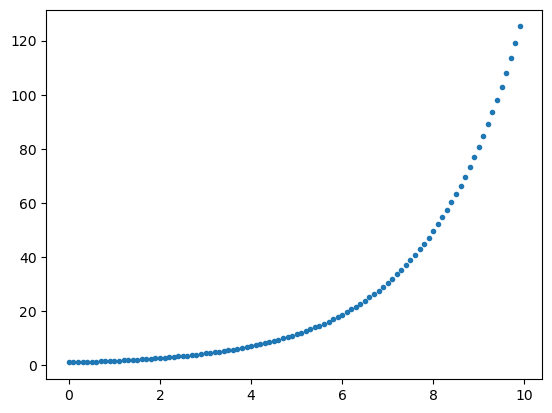

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def move_Euler(diffeq, y, dt):
    ydot = diffeq(y)
    y = y + ydot * dt
    return y

dt = 0.1
x0 = 1
x_list = [x0]
t_range = np.arange(0,10,dt)

def diffeq(x):
    xdot = 0.5*x
    return xdot

for t in t_range[:-1]:
    temp = move_Euler( diffeq, x_list[-1], dt )
    x_list.append(temp)
    
plt.plot(t_range, x_list, '.')

<div class="span alert alert-success">
    
Now is your turn to extend the code above to **multiple independent variables**.

$$\frac{d x_1(t)}{dt} = 0.5 x_1(t)$$ 
$$\frac{d x_2(t)}{dt} = 0.6 x_2(t)$$ 

with the initial condition $x_1(0)=x_2(0)=1$. But there's a catch - you cannot create two copies of the code above for $x_1$ and $x_2$. There can only be one diffeq() function. Work on the diffeq() function provided below, where $y$ is a Numpy array that contains $x_1$ and $x_2$ and y_list contains all the $(x_1,x_2)$ pairs at different times.

In [ ]:
import numpy as np
%matplotlib inline

def move_Euler(diffeq, y, dt):
    ydot = diffeq(y)
    y = y + ydot * dt
    return y

dt = 0.1
y0 = [1,1]
y_list = [y0]
t_range = np.arange(0,10,dt)

def diffeq(y):
    x1, x2 = y
    # something here
    return 

for t in t_range[:-1]:
    temp_array = move_Euler( diffeq, y_list[-1], dt )
    y_list.append(temp_array)



<div class="span alert alert-success">
    
Next we consider **multiple dependent variables**. Consider the 2nd order differential equation 

$$\frac{d^2 x_1(t)}{dt^2} = 0.5$$ 
   
with initial conditions $x_1=1$ and $dx_1/dt=1$ at $t=0$. Although we never solved 2nd order ODEs directly, what we have always been doing is to break it into two 1st order ODES:
    
$$\frac{d x_1(t)}{dt} = x_2(t)$$ 
$$\frac{d x_2(t)}{dt} = 0.5$$ 

with the initial condition $x_1(0)=x_2(0)=1$, which is equivalent to the original 2nd order ODE. Implement this in your code.

In [ ]:
#Your code here

<div class="span alert alert-success">
    
You may have already guessed where we are going with this – solving Newton's equations is all about 2nd order ODEs. Write a code to solve the motion of a particle performing free fall

$$\frac{d^2 z(t)}{dt^2} = -g$$ 
    
with the initial conditions $z=1$ and $v_z=0$. Just like before, you'll need to break this into
$$\frac{d z(t)}{dt} = v_z(t)$$ 
$$\frac{d v_z(t)}{dt} = -g$$ 
    
and the array $y$ now contains $z$ and $v_z$.

In [ ]:
#Your code here

<div class="span alert alert-success">
    
Final ODE refresher challenge! Write a code to solve the motion of three particles performing free fall. There will be  2 first-order ODEs for each particle to solve, so 6 ODEs in total. The 6 variables ($z_1,v_{z1},z_2,v_{z2},z_3,v_{z3}$) will all be contained in the array $y$ and updated simultanesouly (since vectorization is always more efficient in Python). 
    
All particles start from a height of 0 but have different initial velocities of 0, +10, and +20 m/s.

In [ ]:
#Your code here

## 1.  Chaotic Pendulum

The plane pendulum is a classic subject for physics.
However, it has most often been studied assuming small angle
displacements, which is a good approximation only for very large
grandfather clocks. When the pendulum is driven and the
displacements get large, the motion becomes too complicated for analytic
solution. Your overall task for this module is to compute the motion of a driven pendulum
with large displacements, to ensure that your calculation is reliable
and sensitive, and then to search for the simplicity that may underly
complexity.

What we call a *chaotic pendulum* is just a pendulum with friction and a
driving torque (see Figure below), but without the assumption of
small-deflection-angle. 

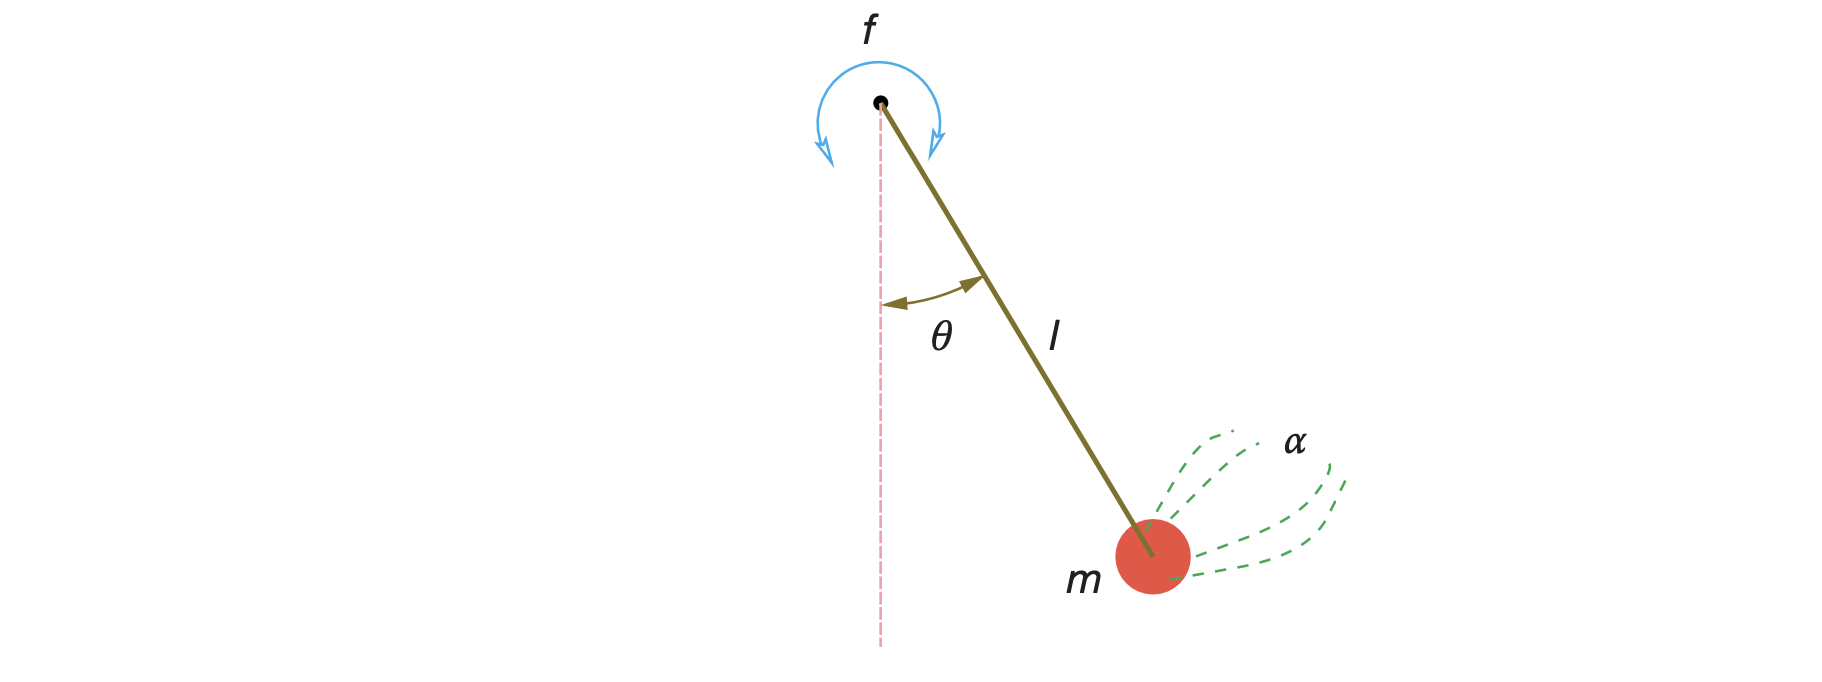

Newton’s laws of rotational motion tell us that
the sum of the gravitational torque $-
{mgl}\sin\theta$, the frictional torque $- {\beta}
\dot{\theta}$, and the external torque ${\tau_{0}}\cos
 \Omega t$ equals the moment of inertia of the pendulum times its
angular acceleration:

$$\begin{align}\tag*{15.1}
I \frac{d^{2}\theta}{dt^{2}}& = - {mgl} \sin\theta - {\beta} \frac{d\theta} {dt} +
{\tau_{0}} \cos\Omega t,\end{align}$$


where $I$ is the moment of inertia of the pendulum, and $\Omega$ is the angular frequency of the exteral torque. This equation can be simplified into


$$\begin{align}\frac{d^{2}\theta}{dt^{2}}  &  =
-\omega_{0}^{2} \sin \theta -\alpha \frac{d\theta}{dt} + f\cos\Omega
t,\tag*{15.2}\\
\mbox{where}\quad \omega_{0} &  =  \frac{mgl}{I},\quad \alpha =
\frac{\beta}{I}, \quad f =\frac{\tau_0}{I}.\tag*{15.3}\end{align}$$

Equation (15.2) is a second-order time-dependent nonlinear differential
equation. Its nonlinearity arises from the $\sin\theta$ term in the gravitational torque, as opposed to
a linear $\theta$ term in small-angle approximations. The parameter
$\omega_{0}$ is the natural frequency of the system arising from the
restoring torque, $\alpha$ is a measure of the strength of friction, and
$f$ is a measure of the strength of the driving torque. Broken down into two first-order ODEs, we have:

$$\begin{align}
\tag*{15.4}
\frac{d\theta}{dt}  & =   \omega, \text{ the angular velocity of the pendulum,}\\
\frac{d\omega}{dt} & =  - \omega_{0}^{2} \sin \theta - \alpha
\omega + f\cos\Omega t , \tag*{15.5} \end{align}$$


## 1.1  Free Pendulum Oscillations

If we ignore friction and external torques, we get a **realisitc free pendulum**. Newton’s law (15.2) takes the simple, yet still nonlinear, form $$\tag*{15.6}
\frac{d^{2}\theta}{dt^{2}} = -\omega_{0}^{2} \sin \theta$$

If the displacements are small, we can approximate $\sin \theta$ by
$\theta$ and obtain the linear equation of simple harmonic motion with
frequency $\omega_0$:

$$\tag*{15.7}
\frac{d^{2}\theta}{dt^{2}} \simeq -\omega_0^2 \theta
$$

with the harmonic solution
$$ \theta(t) = \theta_{0} \sin(\omega_{0} t
+ \phi).$$

Without the small-angle approximation, we can still expect solutions of a **realisitc free pendulum** (15.6) to be periodic, but with a frequency $\omega \simeq
\omega_0$ only for small oscillations. Furthermore, because the
restoring torque, $mgl\sin\theta \simeq mgl (\theta - \theta^3/3)$, is
less than the $mgl\theta$ assumed in a harmonic oscillator, **realistic
pendulums swing slower** (have longer periods) as their angular
displacements are made larger. This will be verified soon.

The analytic solution to the realistic pendulum is a textbook problem involving elliptical integrals. Here we will opt to find a numerical solution.

## 1.2  Implementation the Free Pendulum

<div class="span alert alert-success">

Here we will consider a free pendulum and use our Euler or Runge-Kutta-2nd-order ODE solver to solve (15.6). Later on in this module we will use the code you develop here as a basis for solving the equations of motion of a driven pendulum (15.2).


1.  First test your program for the linear case ($\sin\theta \rightarrow
    \theta$) for small angles, and verify that your solution is harmonic with frequency $\omega_{0}$ by comparing your numerical solution with the analytical solution. For simplicity we'll start with the natural frequency being $\omega_0 = 1$.
    
    
2.  Gradually increase your $\theta(0)$ while keeping $\omega(0)=\dot{\theta}(0)= 0$, i.e. you are simulating releasing the pendulum from larger initial angles. Describe any nonlinear effects you see in the oscillations. Does your numerical solution still agree with the analytical solution? What happens if you release the pendulum at the very top $\theta(0)=\pi$?


3.  For increasing $\theta(0)$, does the oscillation period increase or decrease?    


4.  Set the initial conditions in a way such that the motion changes from
    oscillatory to rotational (i.e. the pendulum swings over the top).


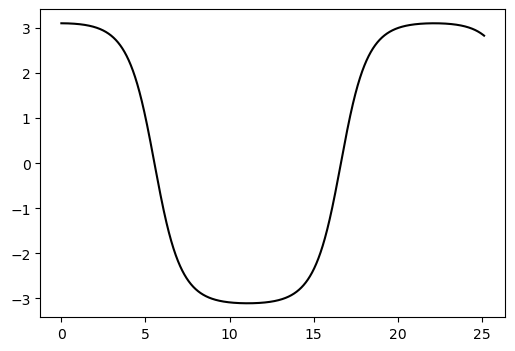

In [49]:
%matplotlib inline
import numpy as np

def move_Euler(f, y, dt):
    ydot = f(y)
    y = y + ydot * dt
    return y

def move_RK2(f, y, dt):
    ydot = f(y)
    y_half = y + ydot * dt/2
    ydot_half = f(y_half)
    y = y + ydot_half * dt
    return y

w0=1

def diffeq(y):
    theta,  omega = y
    #something here
    return 


theta_list = []
omega_list = []
# choose an ODE solver to propagate the equations of motion

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot('k-')
plt.show()


<div class="span alert alert-success">
Next we'll do a quick preview of our realistic pendulum simulation using an animation. A template is given below that simply animates $x=\cos(t)$ and $y=\sin(t)$. Try to modify it so that it plots the solution of our realistic pendulum, where one dot sits at the origin and the other dot represents the particle at the end of the pendulum.

In [ ]:
%matplotlib notebook

import matplotlib.animation as ani

L=3
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2)

t_range = np.arange(0,10,0.01) 
x_list = np.cos(t_range)
y_list = np.sin(t_range)

def animate(i):
    line.set_data([0,x_list[i] ], [0, y_list[i]])
    return line,

ani = ani.FuncAnimation(
    fig, animate, len(t_range), interval=dt*50, blit=True)
plt.show()


## 2  Visualization: Phase Space Orbits<a id="15.2"></a>

So far we've been plotting only $\theta(t)$. To prepare ourselves for analyzing more complex behaviors, we'll introduce the concept of phase space here, where we can visualize both $\theta(t)$ and $\dot{\theta}(t)$ (or equivalently, $\omega(t)$).

Consider a general solution to an equation of motion where the position
$x(t)$ and the velocity $v(t)$ are functions of time. Often behaviors
that appear complicated as functions of time appear simpler when viewed
in an abstract space called *phase space*, where the ordinate is the
velocity $v(t)$ and the abscissa is the position $x(t)$ (Figure 15.3).
As we see from the phase space figures, the solutions form geometric
objects that are easy to recognize.

In **Figure 15.3** below, we demonstrate three potentials along with the phase space trajectories of particles moving in these potentials. The different orbits below the potentials correspond to different energies, as
indicated by the limits of maximum displacements within the potentials (vertical dashed
lines). 

**Figure 15.3** left panel shows that a repulsive potential leads to open orbits characteristic of
nonperiodic motion. The trajectories cross at the hyperbolic point in the middle,
an unstable equilibrium point. 

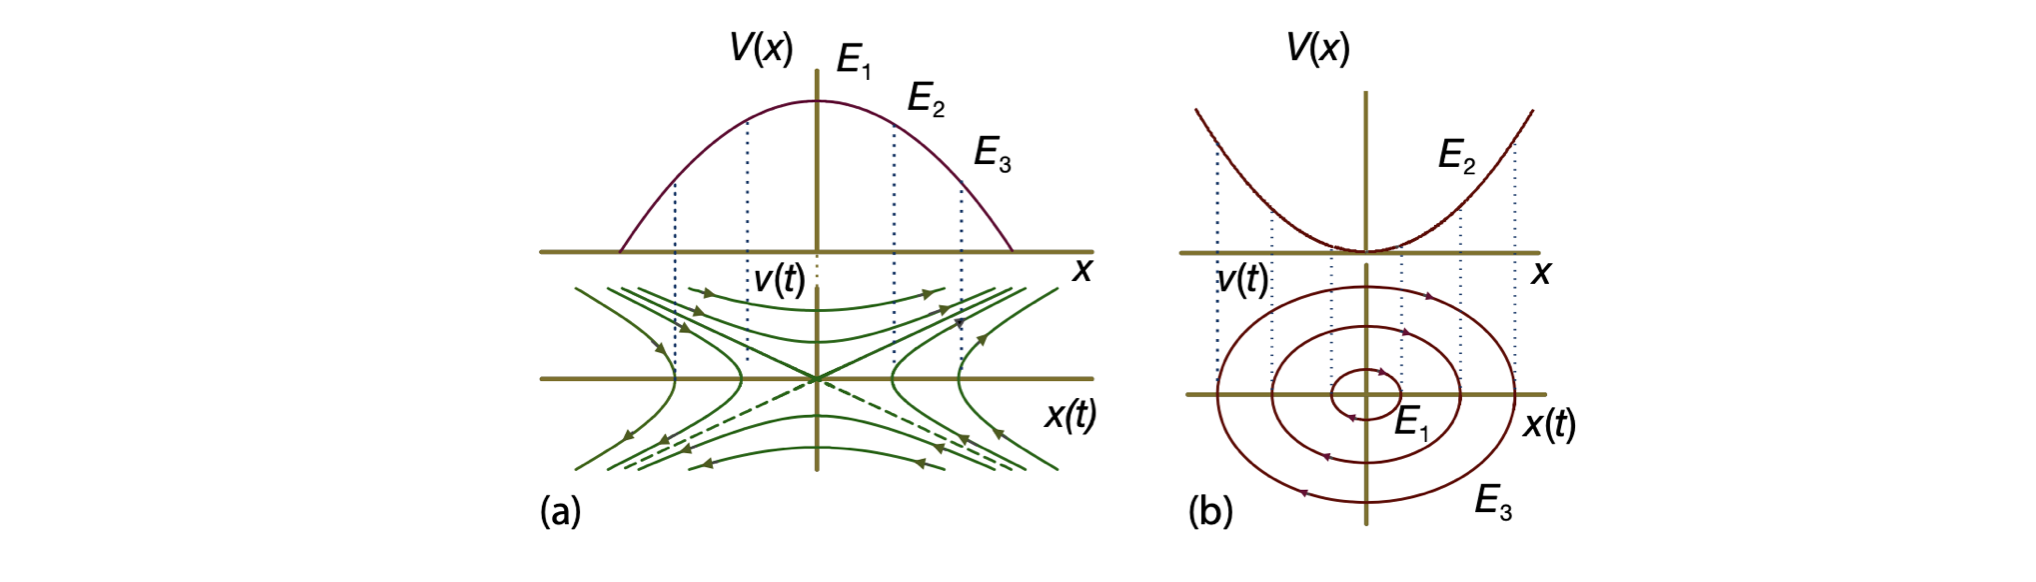

**Figure 15.3** right panel shows that a free harmonic oscillator leads to
symmetric ellipses; the closed orbits indicate periodic behavior, and the symmetric trajectories indicate a symmetric potential. The position and velocity of a free harmonic oscillator are given by the
trigonometric functions

$$\tag*{15.11} x(t)= A \sin(\omega t),\quad v(t) = \frac{dx}{dt} = \omega A
\cos(\omega t).$$

When substituted into the total energy, we obtain two important results:

$$\begin{align}
\tag*{15.12}
E & =  {\rm KE} + {\rm PE} = \left(\frac{1}{2} m\right) v^{2} +
\left(\frac{1}{2} \omega^{2}m^{2}\right) x^{2}\\
& =  \frac{m \omega^{2} A^{2}}{2} \cos^{2}(\omega t) +
\frac{m\omega^{2} A^{2}}{2} \sin^{2}(\omega t) = \frac{1}{2}
m\omega^{2}A^{2}.\tag*{15.13}\end{align}$$

The first equation, being that of an ellipse, proves that the harmonic
oscillator follows closed elliptical orbits in phase space, with the
size of the ellipse increasing with the system’s energy. The second
equation proves that the total energy is a constant of the motion.
Different initial conditions having the same energy start at different
places on the same ellipse and transverse the same orbits.

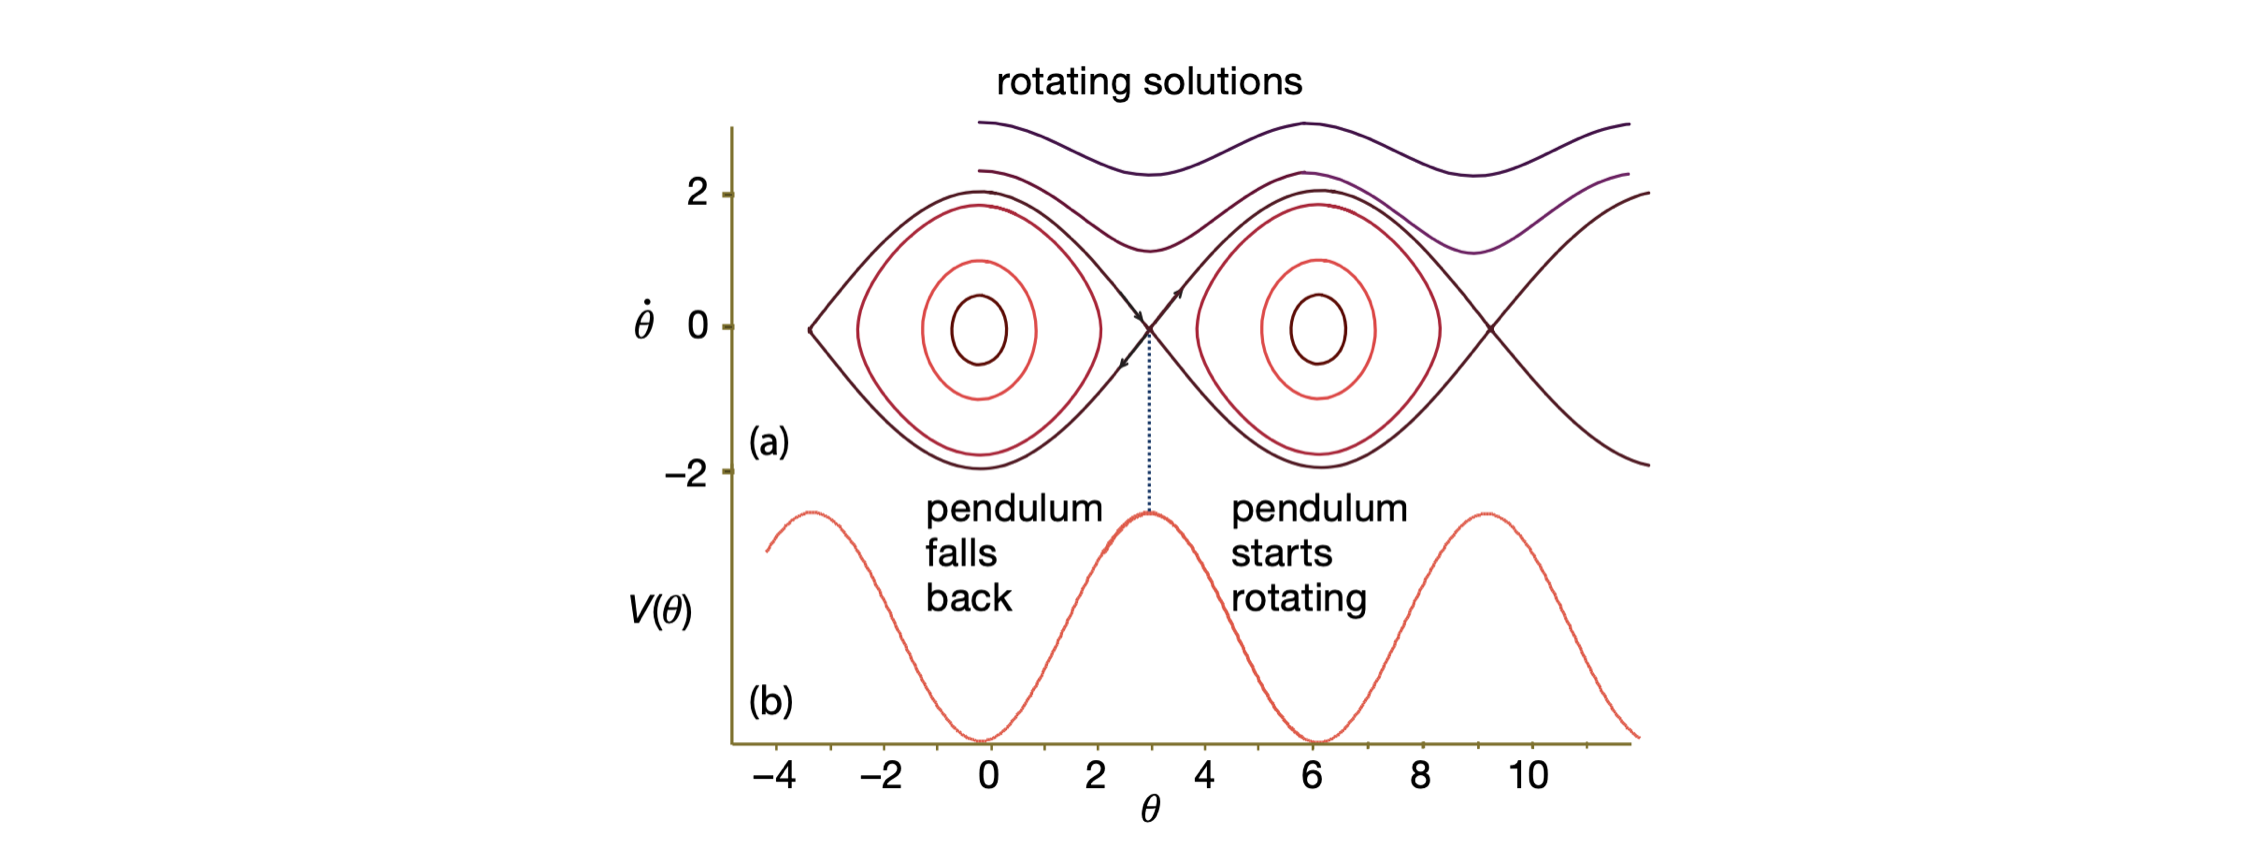

<div class="span alert alert-success">

1. Make phase space trajectory plots for your numerical solutions of $ \theta(t) $ and $ \dot{\theta}(t)=\omega(t) $ for the realistic free pendulum. An expected outcome is shown above: following this figure, you should vary initial conditions to generate at least one of the following behaviors.
    
-   Closed trajectories describe periodic oscillations \[the same
    $(x,v)$ occur again and again\], with a clockwise motion arising
    from the restoring torque.

    
-   Open orbits correspond to running motion (a
    pendulum rotating like a propeller).

    
-   A special solution exist between the closed and open trajectories: the connected closed orbits with pointy ends. This is called the **separatrix**, where motion is indeterminant, as the pendulum may balance, or move either left or right from the top.

    
2. Verify that different orbits never cross, because solutions for different initial conditions are unique. 
    
    
3. After producing the whole plot, identify regions of space space where the potential is repulsive and leads to shapes like in Figure 15.3 left panel, and where the potential is attractive and leads to shapes like in figure 15.3 right panel.

